In [1]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.io.shapereader as shpreader


import matplotlib.backends.backend_pdf as pdf
import matplotlib.font_manager as mfm
import matplotlib.patches as patches

In [2]:
# more setup
cm = 1/2.54
a4_landscape = (29.7*cm,21*cm)
a4_portrait = (21*cm,29.7*cm)
a5_landscape = (21*cm,14.8*cm)
a5_portrait = (14.8*cm,21*cm)

iceland_extent = (-25.356,-11.997,62.472,67.458)
capital_region_extent = (-22.769,-21.110, 63.729, 64.373)

fname = '/Users/odinndagur/Downloads/gadm36_ISL_shp/gadm36_ISL_2.shp'

In [3]:
# ignore unimportant warning that comes up
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
# clean data and make a dataframe and bbox
import json
import numpy as np

with open('pools.json','r') as f:
    data = json.load(f)

for x in data:
    x['address'] = x['address'].strip()
    if(len(x['coordinates']) > 0):
        x['longitude'], x['latitude'] = float(x['coordinates'].split(',')[0]), float('-' + x['coordinates'].split(',')[1])

df = pd.DataFrame(data=data)

BBox = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())


[array([[ 1.85713067, -5.56214424]])]
[-19.0, 65.0] 
 [-3.25052913e+07  1.11908472e+08] 
 [ 1.85713067 -5.56214424] 
 [ 1.85713067 -5.56214424] 

(-32505291.31163588, 111908472.4886216)
(1.8571306657211442, -5.562144239401454)
------------  Bbox(x0=0.17244287838592492, y0=0.0, x1=0.8275571216140751, y1=1.0) linear Affine2D().scale(72.0)


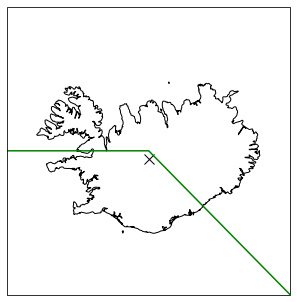

<Figure size 432x288 with 0 Axes>

In [68]:
import inspect

def axis_data_coords_sys_transform(axis_obj_in,xin,yin,inverse=False):
    """ inverse = False : Axis => Data
                = True  : Data => Axis
    """
    xlim = axis_obj_in.get_xlim()
    ylim = axis_obj_in.get_ylim()

    xdelta = xlim[1] - xlim[0]
    ydelta = ylim[1] - ylim[0]
    if not inverse:
        xout =  xlim[0] + xin * xdelta
        yout =  ylim[0] + yin * ydelta
    else:
        xdelta2 = xin - xlim[0]
        ydelta2 = yin - ylim[0]
        xout = xdelta2 / xdelta
        yout = ydelta2 / ydelta
    return xout,yout

fig = plt.figure()
ax = plt.axes(projection=ccrs.Mercator())

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

# region_extent = capital_region_extent
# # ax.set_extent(region_extent, crs=ccrs.PlateCarree())
extent = (-26,-12,62,68)
ax.set_extent(extent, crs=ccrs.PlateCarree())
# ax.set_global()
center = [((-26) + (-12))/2, (62 + 68)/2]
# ax.set_title('Ísland')
ax.coastlines()


plt.draw()
l = plt.plot(center[0],center[1],'x', color='black', markersize=10, linestyle="None", transform=ccrs.PlateCarree())
l2 = plt.plot(1.85713067, -5.56214424,'o',color='green',markersize=15,linestyle="None",transform=plt.gca().transAxes)

print([p.get_xydata() for p in [l for l in l2]])
fig.canvas.draw()



axis_to_data = ax.transAxes + ax.transData.inverted()
data_to_axis = axis_to_data.inverted()
points_data = axis_to_data.transform(center)
points_data2 = data_to_axis.transform(center)
points_data3 = ax.transLimits.transform(center)
print(center, '\n', points_data, '\n', points_data2, '\n', points_data3, '\n')


print(axis_data_coords_sys_transform(ax,center[0],center[1]))
print(axis_data_coords_sys_transform(ax,center[0],center[1], inverse=True))

# for line in l:
    # print(dir(line))
    # print(line.get_transform())
    # line.set_transform(line.get_transform().inverted())
    # print(line.get_transform())
    # line.set_transform(ax.get_transform().inverted())
    # for point in line.get_xydata():
    #     print(point)

# plt.plot(50,50,'o',color='red',markersize=10,linestyle='None')




# temp = (center[0],center[1])

# print(-25.356,-11.997,62.472,67.458)
# # print('original: ',temp)
# # print('transform: ', ax.transData.transform(temp))
# # print('inverse of transform: ', ax.transData.inverted().transform(ax.transData.transform(temp)))



# # for val in inspect.getmembers(ax.bbox):
# #     print(val)
# # print('bbox: ', inspect.getmembers(ax.bbox))
# print('xlim: ', ax.get_xlim(), 'ylim: ', ax.get_ylim())
# print('window extent: ', ax.get_window_extent())
def inv(xy):
    return ax.transData.inverted().transform(xy)
def trn(xy):
    return ax.transData.transform(xy)

print('------------ ', ax.get_position(), ax.get_xscale(), fig.dpi_scale_trans)

# extent = [-26,-12,62,68]
# print('trn xy: ', trn((-26, 62)))
# print(trn((-12,68)))

# print(inv((ax.get_xlim()[0],ax.get_ylim()[0])))

# print((temp))
# print(trn(temp))
# print('bbox xmin xmax ymin ymax: ', (ax.bbox.xmin, ax.bbox.xmax, ax.bbox.ymin, ax.bbox.ymax))
# print(ax.get_window_extent())

# print(center)

# transform = ccrs.Mercator()._as_mpl_transform(ax)
# # print('transform: ', dir(transform), transform.transform_point(temp))

# # for index, obj in pool.iterrows():
# #     if(obj['longitude'] > 0):
# #         ax.text(obj['latitude'],obj['longitude'], obj['name'], color='black', size=5, ha='center', va='center', transform=ccrs.PlateCarree())#, 

# # plt.gca().set_axis_off()
# print((plt.gca().get_ylim()))
# print(dir(plt.gca().get_transform()))
# print(plt.gca().transform_point)


import matplotlib.lines as lines
mynewline = lines.Line2D((0,0.5,1),(0.5,0.5,0),color='g',transform=plt.gca().transAxes) # Axes coordinates

plt.gca().add_artist(mynewline)

plt.show()
# fig.set_clip_box(ax.get_window_extent())
# # plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
# #             hspace = 0, wspace = 0)
# # plt.margins(0,0)
plt.savefig('transform.svg')
# plt.show()